In [1]:
import asyncio
from house_labelling import label_house
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import os

# Get the current directory (for Jupyter notebook)
script_dir = os.getcwd()

# Test image paths - using both aerial and street view for better analysis
image_paths = [
    os.path.join(script_dir, 'images', 'arial_response.png'),
    os.path.join(script_dir, 'images', 'sv_response.png')
]

# Function to annotate image with recommendations
def annotate_image(image_path, recommendations):
    # Open the image and convert to RGB mode
    img = Image.open(image_path).convert('RGB')
    draw = ImageDraw.Draw(img)
    
    # Try to load a font, fall back to default if not available
    try:
        font = ImageFont.truetype("/System/Library/Fonts/Helvetica.ttc", 20)
    except:
        font = ImageFont.load_default()
    
    # Colors for different recommendations
    colors = ['red', 'blue', 'green']
    
    # Draw each recommendation
    for i, rec in enumerate(recommendations):
        x = float(rec['x'])
        y = float(rec['y'])
        
        # Draw a circle at the point
        circle_radius = 10
        draw.ellipse([x-circle_radius, y-circle_radius, x+circle_radius, y+circle_radius], 
                    fill=colors[i])
        
        # Draw the title with a number
        text = f"{i+1}. {rec['title']}"
        draw.text((x + 15, y - 10), text, fill=colors[i], font=font)
    
    return img

# Run the analysis and display results
async def analyze_and_display():
    # Get analysis results
    result = await label_house(image_paths)
    
    if result:
        # Create subplots for both images
        fig, axes = plt.subplots(1, 2, figsize=(20, 10))
        
        # Process and display each image
        for i, img_path in enumerate(image_paths):
            annotated_img = annotate_image(img_path, result['recommendations'])
            axes[i].imshow(annotated_img)
            axes[i].axis('off')
            axes[i].set_title('Aerial View' if 'arial' in img_path else 'Street View')
        
        # Add overall score as a title
        fig.suptitle(f'House Analysis Score: {result["final_score"]}/100', fontsize=16)
        plt.tight_layout()
        plt.show()
        
        # Print recommendations details with coordinates
        print("\nDetailed Recommendations:")
        for i, rec in enumerate(result['recommendations'], 1):
            print(f"\n{i}. {rec['title']}")
            print(f"   Description: {rec['description']}")
            print(f"   Location: {rec['location']}")
            print(f"   Coordinates: (x={rec['x']}, y={rec['y']})")
            print(f"   Explanation: {rec['explanation']}")
            
        # Print a summary of just the coordinates
        print("\nCoordinate Summary:")
        print("Point  Title                  Coordinates")
        print("-" * 50)
        for i, rec in enumerate(result['recommendations'], 1):
            print(f"{i:<6} {rec['title'][:20]:<20} (x={rec['x']:<6}, y={rec['y']})")
    else:
        print("Failed to analyze images")


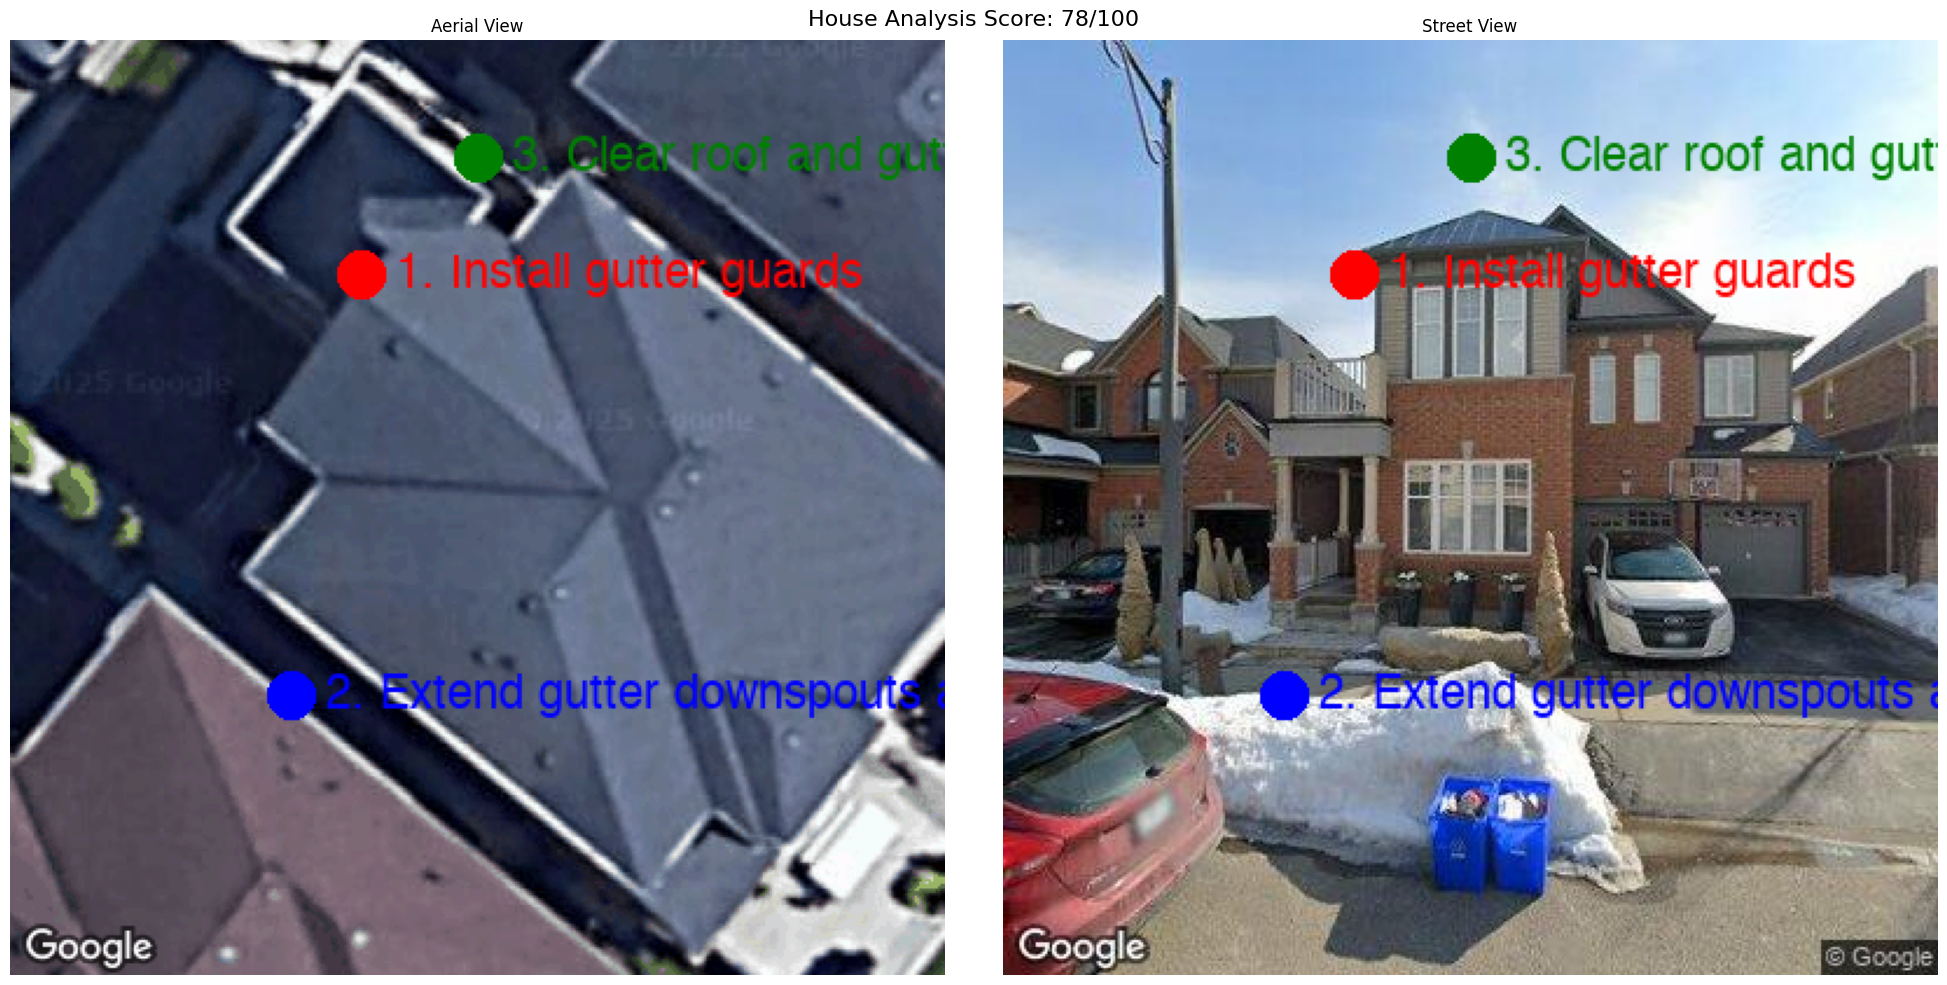


Detailed Recommendations:

1. Install gutter guards
   Description: Install guards to prevent leaves and debris from clogging gutters.
   Location: Gutters
   Coordinates: (x=150, y=100)
   Explanation: The exterior views show that there are no visible gutter guards on the gutters, posing a risk of clogging and subsequent water damage.

2. Extend gutter downspouts away from the house
   Description: Extend downspouts to carry roof water at least 5-10 feet from the foundation.
   Location: Corner of the house
   Coordinates: (x=120, y=280)
   Explanation: Downspouts appear to discharge relatively close to the foundation, increasing the risk of water pooling against the home.

3. Clear roof and gutters of debris
   Description: Remove leaves, pine needles, and other flammable debris from the roof and gutters.
   Location: Roof
   Coordinates: (x=200, y=50)
   Explanation: While some debris is noted, it can be risky as it may lead to blockage and fire hazards; visible debris should be re

In [2]:
# Run the analysis
await analyze_and_display()


In [1]:
import asyncio
from house_labelling import label_house
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import os

# Get the current directory (for Jupyter notebook)
script_dir = os.getcwd()

# Test image paths - using both aerial and street view for better analysis
image_paths = [
    os.path.join(script_dir, 'images', 'arial_response.png'),
    os.path.join(script_dir, 'images', 'sv_response.png')
]

# Function to annotate image with recommendations
def annotate_image(image_path, recommendations):
    # Open the image and convert to RGB mode
    img = Image.open(image_path).convert('RGB')
    draw = ImageDraw.Draw(img)
    
    # Try to load a font, fall back to default if not available
    try:
        font = ImageFont.truetype("/System/Library/Fonts/Helvetica.ttc", 20)
    except:
        font = ImageFont.load_default()
    
    # Colors for different recommendations
    colors = ['red', 'blue', 'green']
    
    # Draw each recommendation
    for i, rec in enumerate(recommendations):
        x = float(rec['x'])
        y = float(rec['y'])
        
        # Draw a circle at the point
        circle_radius = 10
        draw.ellipse([x-circle_radius, y-circle_radius, x+circle_radius, y+circle_radius], 
                    fill=colors[i])
        
        # Draw the title with a number
        text = f"{i+1}. {rec['title']}"
        draw.text((x + 15, y - 10), text, fill=colors[i], font=font)
    
    return img

# Run the analysis and display results
async def analyze_and_display():
    # Get analysis results
    result = await label_house(image_paths)
    
    if result:
        # Create subplots for both images
        fig, axes = plt.subplots(1, 2, figsize=(20, 10))
        
        # Process and display each image
        for i, img_path in enumerate(image_paths):
            annotated_img = annotate_image(img_path, result['recommendations'])
            axes[i].imshow(annotated_img)
            axes[i].axis('off')
            axes[i].set_title('Aerial View' if 'arial' in img_path else 'Street View')
        
        # Add overall score as a title
        fig.suptitle(f'House Analysis Score: {result["final_score"]}/100', fontsize=16)
        plt.tight_layout()
        plt.show()
        
        # Print recommendations details
        print("\nDetailed Recommendations:")
        for i, rec in enumerate(result['recommendations'], 1):
            print(f"\n{i}. {rec['title']}")
            print(f"   Description: {rec['description']}")
            print(f"   Location: {rec['location']}")
            print(f"   Explanation: {rec['explanation']}")
    else:
        print("Failed to analyze images")


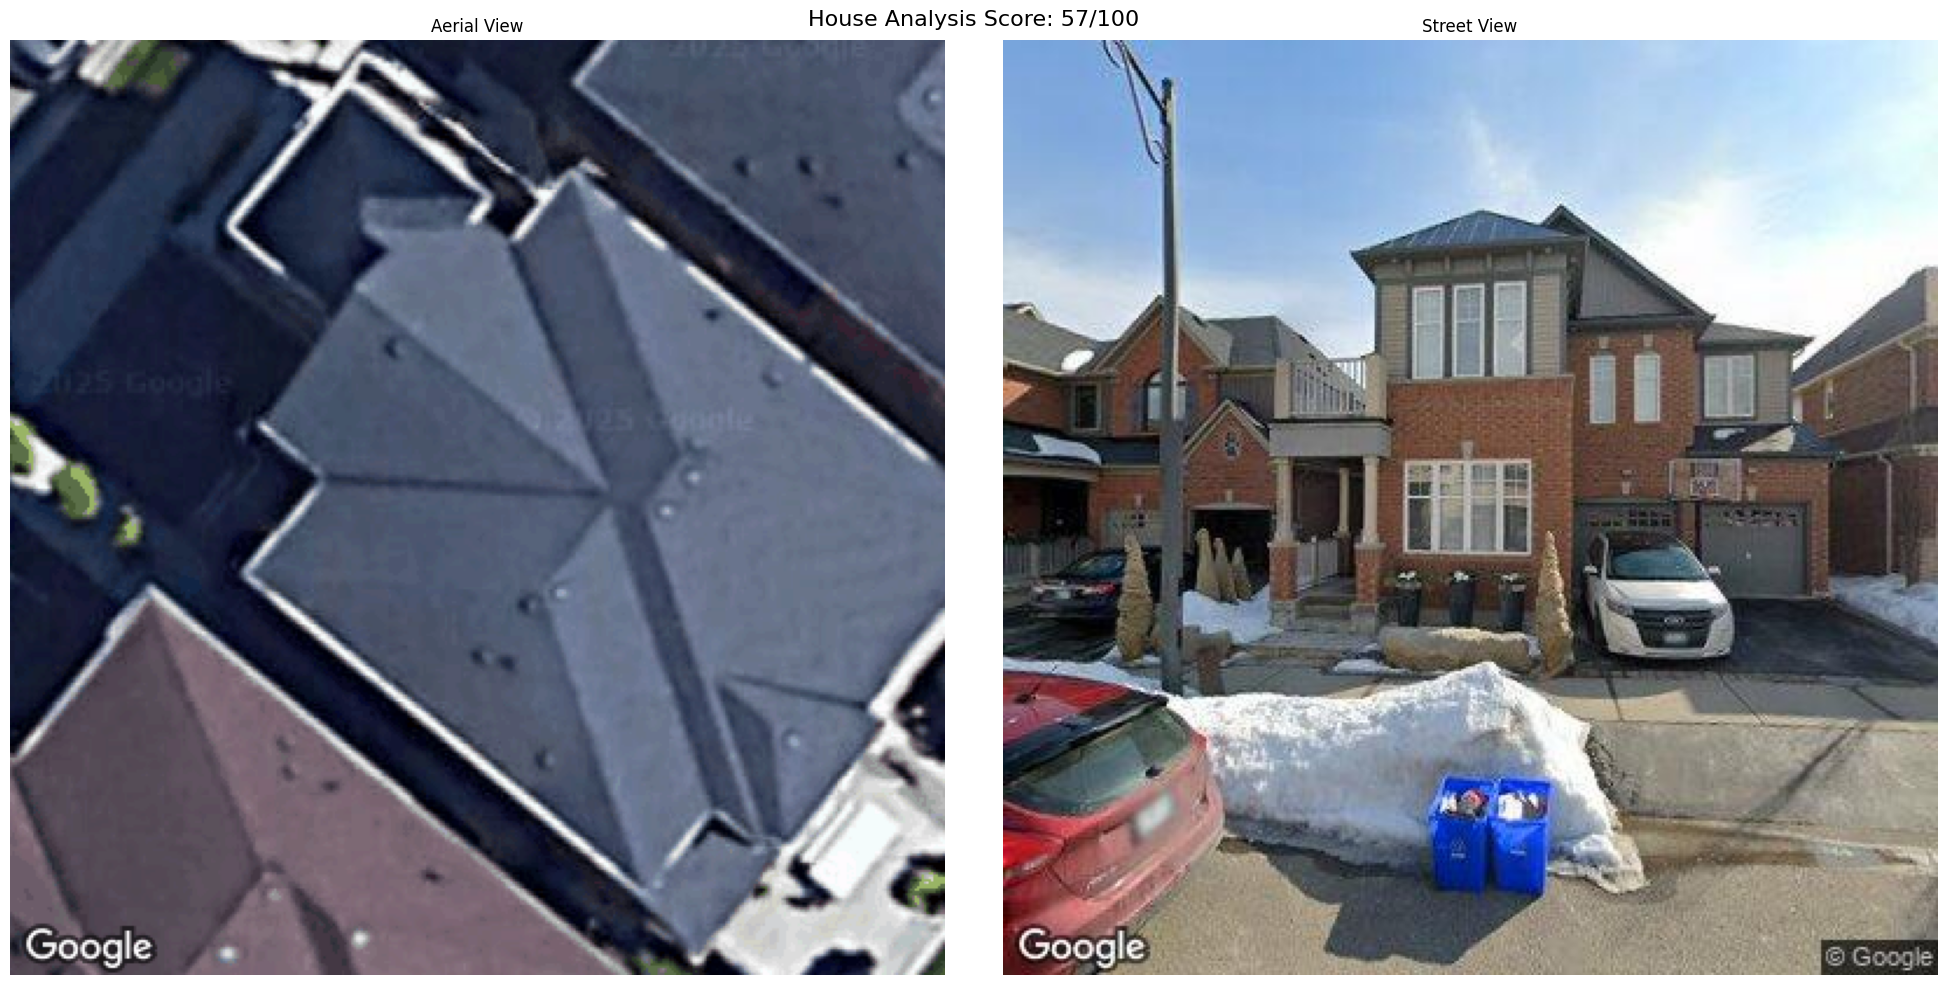


Detailed Recommendations:

1. Install gutter guards
   Description: Install guards to prevent leaves and debris from clogging gutters.
   Location: Gutters
   Explanation: No gutter guards visible in the views provided, which can lead to clogs and increased fire risk.

2. Clear roof and gutters of debris
   Description: Remove leaves, pine needles, and other flammable debris from the roof and gutters.
   Location: Roof
   Explanation: Some debris is observed, indicating a risk of fire hazards.

3. Trim tree branches and shrubs around the house
   Description: Remove large or dead tree branches and shrubs from around the house.
   Location: Yard
   Explanation: Branches and shrubs appear close to the house, which could pose a fire risk.


In [2]:
# Run the analysis
await analyze_and_display()
